In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import timeit
import openpyxl
from pywaffle import Waffle
import math
from tabulate import tabulate

In [2]:
start = timeit.default_timer()

stop = timeit.default_timer()
print('Time: ', stop - start)  

Time:  5.630002124235034e-05


In [16]:
def readSpreadsheets(fileName:str):
    # creating or loading an excel workbook
    newWorkbook = openpyxl.load_workbook(fileName)
    sheetnamesList = newWorkbook.sheetnames
    return sheetnamesList

spreadsheetsList = readSpreadsheets(student)
spreadsheetsList

['General Information',
 'Markers',
 'Segment Orientation - Quat',
 'Segment Orientation - Euler',
 'Segment Position',
 'Segment Velocity',
 'Segment Acceleration',
 'Segment Angular Velocity',
 'Segment Angular Acceleration',
 'Joint Angles ZXY',
 'Joint Angles XZY',
 'Ergonomic Joint Angles ZXY',
 'Ergonomic Joint Angles XZY',
 'Center of Mass',
 'Sensor Free Acceleration',
 'Sensor Magnetic Field',
 'Sensor Orientation - Quat',
 'Sensor Orientation - Euler']

In [2]:
# def readCategory(file_path:str, sheet_name:str, category: list, frameRate: int, Duration: float, startingTime: float = 0):
    
#     df = pd.read_excel(file_path, header=0, index_col= 0 ,sheet_name = sheet_name, usecols = category)
#     num_rows = df.shape[0]
#     print(num_rows)
#     desired_num_rows = math.floor(frameRate*Duration) 
#     starting_rows =  math.floor(startingTime*frameRate) 
#     ending_rows = starting_rows + desired_num_rows
#     if desired_num_rows > num_rows:     
#         return df.iloc[starting_rows:-1]
#     else:
#         return df.iloc[starting_rows:ending_rows]
    
def readCategory(file_path:str, sheet_name:str, category: list, duration: int, startingTime: int = 0):
    
    df = pd.read_excel(file_path, header=0, index_col= 0 ,sheet_name = sheet_name, usecols = category)
    starting_rows = startingTime
    ending_rows = starting_rows + duration + 1
    return df.iloc[starting_rows:ending_rows]

In [3]:
start = timeit.default_timer()
reference = r"../data/REference 240Hz data/Real horse riding/Reference Realhorse1-001dressage.xlsx"
sheet_name = "Joint Angles ZXY"
category = ["Frame", "L5S1 Lateral Bending"]
reference_df = readCategory(reference, sheet_name, category, 100, 20 )
reference_df
stop = timeit.default_timer()
print('Time: ', stop - start)  

Time:  119.09361589999935


In [4]:
student = r"C:/Users/yethu/Desktop/Movement Analysis Project/data/Reference downsampled data/Simulator riding/Reference Harjusimu-003 Extended walk.xlsx"
sheet_name = "Joint Angles ZXY"
category = ["Frame", "L5S1 Lateral Bending"]
# num_rows = 10

student_df = readCategory(student,sheet_name, category, 3, 1)
student_df

,L5S1 Lateral Bending
Frame,
10,1.781752
20,1.881491
30,1.979502
40,2.097826


In [5]:
# def ComparisionGraph(dataframes: list, dataframe_names: list[str], title: str, x_label: str, y_label: str, min_critical_value: float, max_critical_value: float, figsize: tuple = (15, 5)):
#     fig, ax = plt.subplots(figsize= figsize)
#     for (dataframe, dataframe_name) in zip(dataframes, dataframe_names):
#         ax.plot(dataframe, label= dataframe_name, linewidth=1)
#     ax.set_xlabel(x_label)
#     ax.set_ylabel(y_label)
#     ax.set_title(title)
#     ax.axhline(y = max_critical_value, color = 'r', linestyle = '-', label = "maximum threshold")
#     ax.axhline(y = min_critical_value, color = 'g', linestyle = '-', label = "minimum threshold")
#     ax.legend()
#     return fig

def ComparisionGraph(dataframes: list, dataframe_names: list[str], x_label: str, y_label: str, min_critical_value: float, max_critical_value: float, figsize: tuple = (15, 5)):
    fig, ax = plt.subplots(figsize= figsize)
    for (dataframe, dataframe_name) in zip(dataframes, dataframe_names):
        ax.plot(dataframe, label= dataframe_name, linewidth=1)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.axhline(y = max_critical_value, color = 'r', linestyle = '-', label = "maximum threshold")
    ax.axhline(y = min_critical_value, color = 'g', linestyle = '-', label = "minimum threshold")
    ax.legend()
    return fig


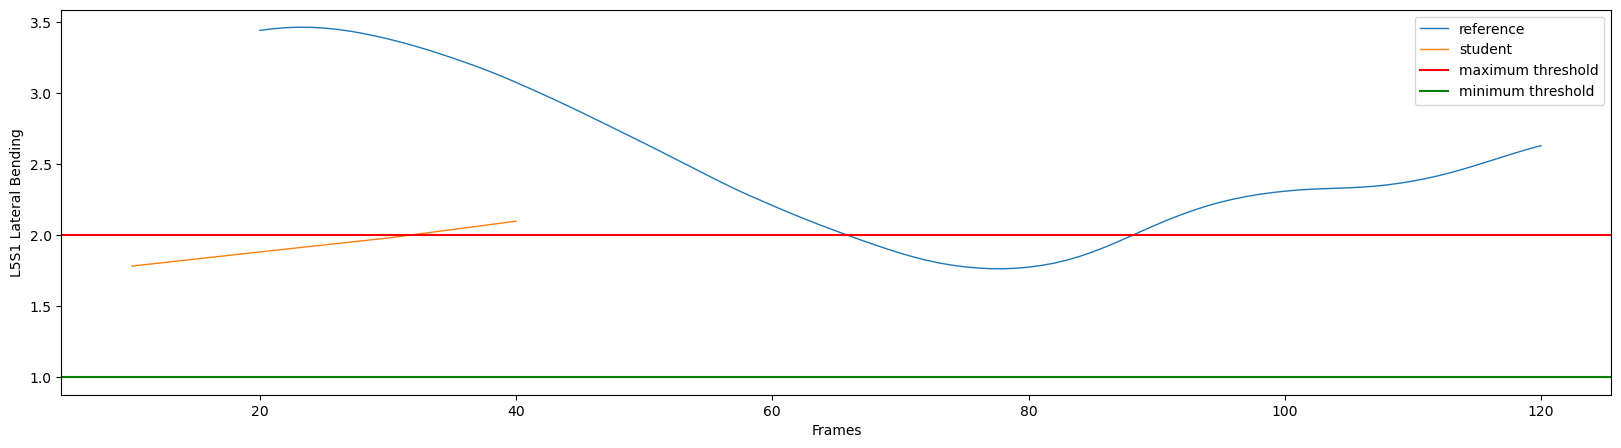

<Figure size 640x480 with 0 Axes>

In [6]:
fig = ComparisionGraph([reference_df, student_df],['reference', 'student'], "Frames" , "L5S1 Lateral Bending", 1 , 2, (20,5))
plt.show()
plt.tight_layout()

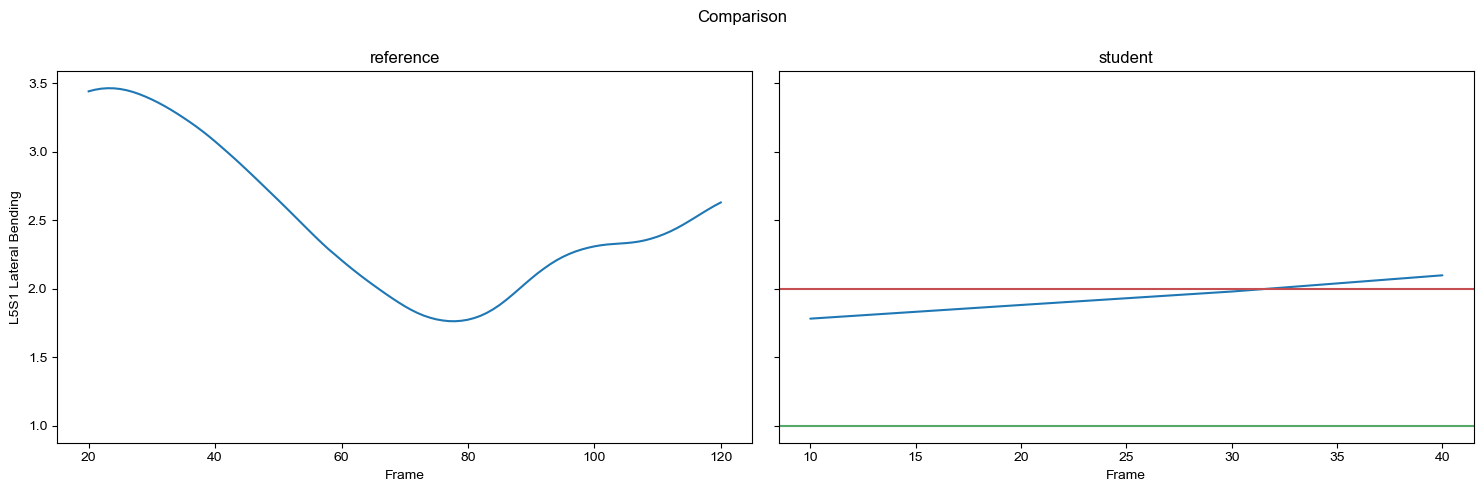

In [7]:
def ComparisionGraph2(dataframes: list, dataframe_names: list[str], title: str, x_labels: list, y_labels: list,min_critical_value, max_critical_value, figsize: tuple = (15, 5), ):    
    fig, axes = plt.subplots(1, len(dataframes), figsize= figsize, sharey=True)
    fig.suptitle(title)  
    for count, (dataframe,dataframe_names)  in enumerate(zip(dataframes,dataframe_names)):
        sns.lineplot(ax=axes[count], x= dataframe.index, y=dataframe["L5S1 Lateral Bending"], data=dataframe)
        sns.set(style="whitegrid")
        axes[count].set_title(dataframe_names)
    plt.axhline(y = max_critical_value, color = 'r', linestyle = '-', label = "maximum threshold")
    plt.axhline(y = min_critical_value, color = 'g', linestyle = '-', label = "minimum threshold")
    return fig

fig = ComparisionGraph2([reference_df, student_df],['reference', 'student'], "Comparison", ["x", "x1"] , ["y","y1"],1, 2, (15,5))
plt.tight_layout()
plt.show()

In [8]:
reference_df.describe()

,L5S1 Lateral Bending
count,101.000000
mean,2.479481
std,0.536071
min,1.762893
25%,2.061649
50%,2.343778
75%,2.867260
max,3.462292


In [9]:
student_df.describe()

,L5S1 Lateral Bending
count,4.000000
mean,1.935142
std,0.135205
min,1.781752
25%,1.856556
50%,1.930496
75%,2.009083
max,2.097826


In [10]:
min_critical_value = input(r"Enter the minimum critical value (below which will be regarded as low)")
max_critical_value = input(r"Enter the maximum critical value (below which will be regarded as high)")

KeyboardInterrupt: Interrupted by user

### Threshold value

In [11]:
def calculateThreshold(df, category, min_critical_value, max_critical_value):
    statusDataframe = pd.DataFrame(df)
    if min_critical_value is None or max_critical_value is None:
        min_critical_value = df[category].describe().min()
        max_critical_value = df[category].describe().max()
    statusDataframe["Status"] = statusDataframe[category].apply(lambda x: "too low" if x < min_critical_value else ("too high" if x > max_critical_value else "optimal"))
    return statusDataframe

statusDataframe = calculateThreshold(reference_df,"L5S1 Lateral Bending",1.8, 2)
statusDataframe

,L5S1 Lateral Bending,Status
Frame,,
20,3.439696,too high
21,3.451319,too high
22,3.458980,too high
23,3.462292,too high
24,3.461545,too high
...,...,...
116,2.521229,too high
117,2.549931,too high
118,2.577751,too high


In [12]:
def outputCriticalValues(dataframe, category, frameRate):
    (row, col) = dataframe.shape
    WithinRange = dataframe[category].value_counts()["medium"]
    outofRange = row - WithinRange
    durationInSecond = row / frameRate
    rate = outofRange / durationInSecond
    print(f"Number of outofRange {outofRange} in {durationInSecond} second")
    print(f"Number of WithinRange {WithinRange} in {durationInSecond} second")
    print(f"Number of Medium {outofRange} in {durationInSecond} second")
    print(f"Number of WithinRange {WithinRange} in {durationInSecond} second")
    print("Out of Range per minute:", rate)
    return None

outputCriticalValues(statusDataframe, "Status", 240)

KeyError: 'medium'

In [ ]:
def calculateSummary(statusDataframe):
    
    status_count = statusDataframe["Status"].value_counts()
    total = statusDataframe.shape[0]
    headers = [header for header in status_count.index] 
    summary_list = [[round(count*100/total, 1), count] for _,count in zip(status_count.index, status_count.values)]
    print(summary_list)

calculateSummary(statusDataframe)

In [21]:
def pieChart(statusDataframe, title: str = ""):    
    data = statusDataframe["Status"].value_counts()
    fig = plt.figure()
    explode = (0.05)
    for i in range(1, data.shape[0]):
        explode += 0.05
    data = statusDataframe["Status"].value_counts()
    colors = {'too high': '#ff6666', 'optimal': '#ffcc99', 'too low': '#99ff99'}
    plt.pie(data, labels = data.index,colors=[colors[c] for c in data.index], autopct='%1.1f%%')
    #draw circle
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    
    plt.axis('equal')     # Equal aspect ratio ensures that pie is drawn as a circle
    plt.legend()
    plt.tight_layout()
    plt.title(title)
    return fig    

too high    78
optimal     15
too low      8
Name: Status, dtype: int64


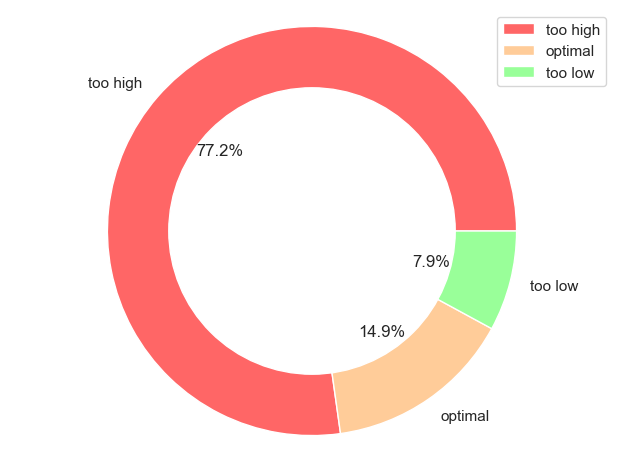

In [22]:
fig = pieChart(statusDataframe)
plt.show()

In [126]:
def outputMinMaxValues(dataframe, movement):
    minimum = dataframe[movement].min()
    minimum_time_inSecond = dataframe[dataframe["L5S1 Lateral Bending"] == minimum].index.tolist()[0]
    minimum_time_inMinute = round(minimum_time_inSecond / 60, 2)
    
    maximum = dataframe[movement].max()
    maximum_time_inSecond = dataframe[dataframe["L5S1 Lateral Bending"] == maximum].index.tolist()[0]
    maximum_time_inMinute =round(maximum_time_inSecond / 60, 2)
    return minimum_time_inMinute, maximum_time_inMinute

In [127]:
x, y = outputMinMaxValues(statusDataframe, "L5S1 Lateral Bending")
print(x, y)

1.3 0.38
